# Wrangle_act

In [17]:
import pandas as pd
import numpy as np
import sqlite3
import re
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline

## 1. Gathering data

### twitter_archive_enhanced.csv

In [3]:
#download csv file to my environment and read it as df file
df=pd.read_csv(r'C:\Users\wythe\OneDrive\udacity\twitter api\twitter-archive-enhanced.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### image_redictions.tsv

In [6]:
import requests
import os

In [7]:
# download this file programmatically using the module Requests
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [8]:
response

<Response [200]>

In [9]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [10]:
os.listdir(folder_name)

['image-predictions.tsv']

In [11]:
# read the downloaded tsv file as df1 file 
df1=pd.read_csv(r'C:\Users\wythe\OneDrive\udacity\twitter api\image_predictions\image-predictions.tsv', sep='\t')

In [12]:
df1

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Tweet_json by Tweepy

>Get the values of tweet's 'retweet' counts and 'favorites' counts in the WeRateDogs Twitter by Python's module Tweepy from Twitter API as JSON data.

In [13]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [14]:
# my API keys and tokens
consumer_key=''
consumer_secret=''
access_token=''
access_secret=''

In [15]:
auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api=tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [16]:
tweet_ids=df.tweet_id.values
len(tweet_ids)

2356

In [64]:
# iteration process on tweet_id
# append aquired data in 'tweet_data'
count=0
tweet_data=[]
fails_dict={}
start=timer()

for tweet_id in tweet_ids:
    count+=1
    print(str(count)+':'+str(tweet_id))
        
    try:
        tweet=api.get_status(tweet_id, tweet_mode='extended')._json
        print('Success')
        favorites=tweet['favorite_count']
        retweet=tweet['retweet_count']
        tweet_data.append({'tweet_id':int(tweet_id),
                           'favorites':int(favorites),
                           'retweet':int(retweet)})    
        
        
       
    except tweepy.TweepError as e:
        print('Fail')
        fails_dict[tweet_id]=e
            
        pass

end=timer()
print(end-start)
print(fails_dict)   

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Fail
298:837110210464448512
Success
299:837012587749474308
Fail
300:836989968035819520
Success
301:836753516572119041
Success
302:836677758902222849
Success
303:83

Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success
567:802247111496568832
Fail
568

Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Fail
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Fail
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
832:768609597686943744
Success
833:76

Rate limit reached. Sleeping for: 669


Success
902:758474966123810816
Success
903:758467244762497024
Success
904:758405701903519748
Success
905:758355060040593408
Success
906:758099635764359168
Success
907:758041019896193024
Success
908:757741869644341248
Success
909:757729163776290825
Success
910:757725642876129280
Success
911:757611664640446465
Success
912:757597904299253760
Success
913:757596066325864448
Success
914:757400162377592832
Success
915:757393109802180609
Success
916:757354760399941633
Success
917:756998049151549440
Success
918:756939218950160384
Success
919:756651752796094464
Success
920:756526248105566208
Success
921:756303284449767430
Success
922:756288534030475264
Success
923:756275833623502848
Success
924:755955933503782912
Success
925:755206590534418437
Success
926:755110668769038337
Success
927:754874841593970688
Success
928:754856583969079297
Success
929:754747087846248448
Success
930:754482103782404096
Success
931:754449512966619136
Success
932:754120377874386944
Success
933:754011816964026368
Fail
934

Success
1162:723912936180330496
Success
1163:723688335806480385
Success
1164:723673163800948736
Success
1165:723179728551723008
Success
1166:722974582966214656
Success
1167:722613351520608256
Success
1168:721503162398597120
Success
1169:721001180231503872
Success
1170:720785406564900865
Success
1171:720775346191278080
Success
1172:720415127506415616
Success
1173:720389942216527872
Success
1174:720340705894408192
Success
1175:720059472081784833
Success
1176:720043174954147842
Success
1177:719991154352222208
Success
1178:719704490224398336
Success
1179:719551379208073216
Success
1180:719367763014393856
Success
1181:719339463458033665
Success
1182:719332531645071360
Success
1183:718971898235854848
Success
1184:718939241951195136
Success
1185:718631497683582976
Success
1186:718613305783398402
Success
1187:718540630683709445
Success
1188:718460005985447936
Success
1189:718454725339934721
Success
1190:718246886998687744
Success
1191:718234618122661888
Success
1192:717841801130979328
Success


Success
1419:698355670425473025
Success
1420:698342080612007937
Success
1421:698262614669991936
Success
1422:698195409219559425
Success
1423:698178924120031232
Success
1424:697995514407682048
Success
1425:697990423684476929
Success
1426:697943111201378304
Success
1427:697881462549430272
Success
1428:697630435728322560
Success
1429:697616773278015490
Success
1430:697596423848730625
Success
1431:697575480820686848
Success
1432:697516214579523584
Success
1433:697482927769255936
Success
1434:697463031882764288
Success
1435:697270446429966336
Success
1436:697259378236399616
Success
1437:697255105972801536
Success
1438:697242256848379904
Success
1439:696900204696625153
Success
1440:696894894812565505
Success
1441:696886256886657024
Success
1442:696877980375769088
Success
1443:696754882863349760
Success
1444:696744641916489729
Success
1445:696713835009417216
Success
1446:696518437233913856
Success
1447:696490539101908992
Success
1448:696488710901260288
Success
1449:696405997980676096
Success


Success
1676:682242692827447297
Success
1677:682088079302213632
Success
1678:682059653698686977
Success
1679:682047327939461121
Success
1680:682032003584274432
Success
1681:682003177596559360
Success
1682:681981167097122816
Success
1683:681891461017812993
Success
1684:681694085539872773
Success
1685:681679526984871937
Success
1686:681654059175129088
Success
1687:681610798867845120
Success
1688:681579835668455424
Success
1689:681523177663676416
Success
1690:681340665377193984
Success
1691:681339448655802368
Success
1692:681320187870711809
Success
1693:681302363064414209
Success
1694:681297372102656000
Success
1695:681281657291280384
Success
1696:681261549936340994
Success
1697:681242418453299201
Success
1698:681231109724700672
Success
1699:681193455364796417
Success
1700:680970795137544192
Success
1701:680959110691590145
Success
1702:680940246314430465
Success
1703:680934982542561280
Success
1704:680913438424612864
Success
1705:680889648562991104
Success
1706:680836378243002368
Success


Rate limit reached. Sleeping for: 666


Success
1802:676957860086095872
Success
1803:676949632774234114
Success
1804:676948236477857792
Success
1805:676946864479084545
Success
1806:676942428000112642
Success
1807:676936541936185344
Success
1808:676916996760600576
Success
1809:676897532954456065
Success
1810:676864501615042560
Success
1811:676821958043033607
Success
1812:676819651066732545
Success
1813:676811746707918848
Success
1814:676776431406465024
Success
1815:676617503762681856
Success
1816:676613908052996102
Success
1817:676606785097199616
Success
1818:676603393314578432
Success
1819:676593408224403456
Success
1820:676590572941893632
Success
1821:676588346097852417
Success
1822:676582956622721024
Success
1823:676575501977128964
Success
1824:676533798876651520
Success
1825:676496375194980353
Success
1826:676470639084101634
Success
1827:676440007570247681
Success
1828:676430933382295552
Success
1829:676263575653122048
Success
1830:676237365392908289
Success
1831:676219687039057920
Success
1832:676215927814406144
Success


Success
2059:671347597085433856
Success
2060:671186162933985280
Success
2061:671182547775299584
Success
2062:671166507850801152
Success
2063:671163268581498880
Success
2064:671159727754231808
Success
2065:671154572044468225
Success
2066:671151324042559489
Success
2067:671147085991960577
Success
2068:671141549288370177
Success
2069:671138694582165504
Success
2070:671134062904504320
Success
2071:671122204919246848
Success
2072:671115716440031232
Success
2073:671109016219725825
Success
2074:670995969505435648
Success
2075:670842764863651840
Success
2076:670840546554966016
Success
2077:670838202509447168
Success
2078:670833812859932673
Success
2079:670832455012716544
Success
2080:670826280409919488
Success
2081:670823764196741120
Success
2082:670822709593571328
Success
2083:670815497391357952
Success
2084:670811965569282048
Success
2085:670807719151067136
Success
2086:670804601705242624
Success
2087:670803562457407488
Success
2088:670797304698376195
Success
2089:670792680469889025
Success


Success
2316:666691418707132416
Success
2317:666649482315059201
Success
2318:666644823164719104
Success
2319:666454714377183233
Success
2320:666447344410484738
Success
2321:666437273139982337
Success
2322:666435652385423360
Success
2323:666430724426358785
Success
2324:666428276349472768
Success
2325:666421158376562688
Success
2326:666418789513326592
Success
2327:666411507551481857
Success
2328:666407126856765440
Success
2329:666396247373291520
Success
2330:666373753744588802
Success
2331:666362758909284353
Success
2332:666353288456101888
Success
2333:666345417576210432
Success
2334:666337882303524864
Success
2335:666293911632134144
Success
2336:666287406224695296
Success
2337:666273097616637952
Success
2338:666268910803644416
Success
2339:666104133288665088
Success
2340:666102155909144576
Success
2341:666099513787052032
Success
2342:666094000022159362
Success
2343:666082916733198337
Success
2344:666073100786774016
Success
2345:666071193221509120
Success
2346:666063827256086533
Success


In [65]:
# read JSON data(tweet_data) as df2 file
df2=pd.DataFrame(tweet_data, columns=(['tweet_id', 'favorites', 'retweet']))
df2              

tweet_id  favorites  retweet
0     892420643555336193      35565     7534
1     892177421306343426      30753     5589
2     891815181378084864      23129     3703
3     891689557279858688      38845     7709
4     891327558926688256      37102     8316
5     891087950875897856      18708     2787
6     890971913173991426      10869     1810
7     890729181411237888      59926    16856
8     890609185150312448      25744     3843
9     890240255349198849      29373     6554
10    890006608113172480      28331     6550
11    889880896479866881      25750     4460
12    889665388333682689      44288     8939
13    889638837579907072      24916     4000
14    889531135344209921      13995     2018
15    889278841981685760      23246     4767
16    888917238123831296      26839     4010
17    888804989199671297      23560     3781
18    888554962724278272      18195     3094
19    888078434458587136      20088     3102
20    887705289381826560      27937     4824
21    887517139158093824      42767    10544
22    887473957103951883      63353    16095
23    887343217045368832      31055     9388
24    887101392804085760      28272     5337
25    886983233522544640      32170     6849
26    886736880519319552      11042     2861
27    886680336477933568      20761     4005
28    886366144734445568      19504     2831
29    886267009285017600        110        4
30    886258384151887873      25821     5651
31    886054160059072513          0       99
32    885984800019947520      30055     6014
33    885528943205470208      33169     5716
34    885518971528720385      18887     3338
35    885311592912609280          0    16528
36    885167619883638784      20162     3903
37    884925521741709313      70962    16128
38    884876753390489601      25649     4983
39    884562892145688576      22420     4204
40    884441805382717440      24977     5091
41    884247878851493888      66876    18154
42    884162670584377345      18834     2676
43    883838122936631299      20146     3063
44    883482846933004288      42258     8838
45    883360690899218434      20908     3304
46    883117836046086144      34229     5953
47    882992080364220416      22044     3477
48    882762694511734784      26067     4372
49    882627270321602560      25856     5434
50    882268110199369728      41352    10349
51    882045870035918850      27072     4354
52    881906580714921986      22473     3043
53    881666595344535552      46748     9550
54    881633300179243008        115        7
55    881536004380872706      45648    14317
56    881268444196462592      21468     4733
57    880935762899988482      15795     2504
58    880872448815771648      19658     3430
59    880465832366813184      26279     5556
60    880221127280381952      24875     3725
61    880095782870896641      25507     3889
62    879862464715927552      20662     3119
63    879674319642796034        290       10
64    879492040517615616      21687     2853
65    879415818425184262      97653    39846
66    879376492567855104      15549     2805
67    879130579576475649          0     6093
68    879050749262655488      20820     4215
69    879008229531029506      17561     2399
70    878776093423087618      17889     3666
71    878604707211726852      27786     6342
72    878404777348136964          0     1146
73    878316110768087041          0     5948
74    878281511006478336       7140     1146
75    878057613040115712      38908     6093
76    877736472329191424      73108    16967
77    877611172832227328          0       71
78    877556246731214848      20977     3413
79    877316821321428993      25373     4670
80    877201837425926144      25042     4998
81    876838120628539392      19151     2991
82    876537666061221889      21923     4214
83    876484053909872640      17393     2124
84    876120275196170240      25908     4192
85    875747767867523072      23230     3830
86    875144289856114688      20311     4411
87    875097192612077568      25419     5474
88    87502

In [66]:
#save df2 as csv file as 'df2.csv' 
df2.to_csv('df2.csv', index=False)

## 2. Acessing data

> Assessment of all gathered datasets(df_main, df_class, df_tweet) for qualaity and tidiness issue are performed here. Right after gathering data and before documenting issues found.

### Quality(10 issues found)

> df_main(twitter_archive_enhanced.csv)
- datatype of ‘timestamp’ is object
- 'source’ column, tabs are not necessary.
- 'name’ column, ‘None’ or ‘a’ are in it.
- 'rating_numerator’ column, the distribution  of the values looks abnormal(max=1776 , mean=13.1, min=0)
- There are unnecessary columns(majority of data in those columns is Nan, ‘in_reply_to_status_id’, ‘in_reply_to_user_id, ‘retweeted_status_id’, ‘retweeted_status_user_id’, ‘retweeted_status_timestamp’)

> df_class(image predictions.tsv)
- There are rows except dogs
- The column ‘img_num’ is not necessary
- 'p1’, ‘p2’, ‘p3’, lowercase and uppercase are mixed
- Those columns such as  ’p1’ and ‘p1_conf’ are not easy to understand( should be renamed as ‘breed’ and ‘p1_conf’ as ‘confidence_level’ )
- p3’ is not necessary because ‘p1’ + ‘p2’ covers majority

> df_tweet(tweet_json.text)
- columns name ‘favorites’ and ‘retweet’ should be renamed  as ‘favorites_counts’ and ‘retweet_counts’ 

### Tidiness(2  issues found)

> df_main(twitter_archive_enhanced.csv)
- dog stages such columns as  ‘doggo’, ‘floofer’, ‘pupper’ and ‘puppo’ are untidy. tidying 

> 3 dfs(df_main, df_class, df_tweet) merge
- After cleaning on each df, those dfs are merged.



## 3. Cleaning data

### twitter_archive_enhanced.csv

> This file is read as 'df_main' on which following cleaning process were made.

In [67]:
#create df_main as copy of df
df_main=df.copy()

In [68]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [69]:
df_main.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Columns 'doggo', 'floofer', 'pupper' and 'puppo'

> Tidying those four columns in to one colum

In [70]:
# check the numbers of None and doggo
df_main.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [71]:
# check the numbers of None and floofer
df_main.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [72]:
# check the numbers of None and pupper
df_main.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [73]:
# check the numbers of None and puppo
df_main.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [74]:
# create new df as 'dog_stage' to combine those four columns + 'tweet_id'
dog_stage=df_main.filter(['tweet_id','doggo',
                           'floofer','pupper','puppo'], axis=1).copy()
dog_stage.head()

tweet_id doggo floofer pupper puppo
0  892420643555336193  None    None   None  None
1  892177421306343426  None    None   None  None
2  891815181378084864  None    None   None  None
3  891689557279858688  None    None   None  None
4  891327558926688256  None    None   None  None

In [75]:
#'dog_stage' melt
dog_stage=pd.melt(dog_stage, 
                   id_vars=['tweet_id'], 
                   value_vars=['doggo','floofer','pupper','puppo'],
                  value_name='dog_stage')
dog_stage.head()

tweet_id variable dog_stage
0  892420643555336193    doggo      None
1  892177421306343426    doggo      None
2  891815181378084864    doggo      None
3  891689557279858688    doggo      None
4  891327558926688256    doggo      None

In [76]:
#check new column 'variable' as a result of melt
dog_stage.variable.value_counts()

puppo      2356
floofer    2356
pupper     2356
doggo      2356
Name: variable, dtype: int64

In [77]:
#drop 'variable'
dog_stage.drop('variable',axis=1, inplace=True)
dog_stage.head()

tweet_id dog_stage
0  892420643555336193      None
1  892177421306343426      None
2  891815181378084864      None
3  891689557279858688      None
4  891327558926688256      None

In [78]:
#check dog_stage columns
dog_stage.dog_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [79]:
#create new df 'dogitionary' that excludes rows with None from 'dog_stage' 
dogitionary=dog_stage.query('dog_stage!="None"')

In [80]:
#check 'dogitionary'
dogitionary.dog_stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [81]:
#check duplication of 'dogitionary'
dogitionary.duplicated().sum()

0

In [82]:
# merge 'df_main' with 'dogitonary'
df_main=pd.merge(df_main, dogitionary, on=['tweet_id'], how='left')
df_main.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo dog_stage  
0                  10   Phineas  None    None   None  None       NaN  
1                  10     Tilly  None    None   None  None       NaN  
2                  10    Archie  None    None   None  None       NaN  
3                  10     Darla  None    None   None  None       NaN  
4                  10  Franklin  None    None   None  None       NaN

In [83]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2370 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2370 non-null   object 
 4   source                      2370 non-null   object 
 5   text                        2370 non-null   object 
 6   retweeted_status_id         183 non-null    float64
 7   retweeted_status_user_id    183 non-null    float64
 8   retweeted_status_timestamp  183 non-null    object 
 9   expanded_urls               2311 non-null   object 
 10  rating_numerator            2370 non-null   int64  
 11  rating_denominator          2370 non-null   int64  
 12  name                        2370 non-null   object 
 13  doggo                       2370 

In [84]:
#pick up necessary columns from 'df_main'
df_main=df_main[['tweet_id','timestamp','source','text','rating_numerator','rating_denominator',
                 'name','dog_stage']]

In [85]:
#check dog_stage is propery included in 'df_main'
df_main.dog_stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_stage, dtype: int64

> created 'dog_stage' column insted of untidy four columns in 'df_main'

In [86]:
#create new df as 'de_main_clean' for cleaning operations
df_main_clean=df_main.copy()
df_main_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name dog_stage  
0                  10   Phineas       NaN  
1                  10     Tilly       NaN  
2                  10    Archie       NaN  
3                  10     Darla       NaN  
4                  10  Franklin       NaN

In [87]:
df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2370 non-null   int64 
 1   timestamp           2370 non-null   object
 2   source              2370 non-null   object
 3   text                2370 non-null   object
 4   rating_numerator    2370 non-null   int64 
 5   rating_denominator  2370 non-null   int64 
 6   name                2370 non-null   object
 7   dog_stage           394 non-null    object
dtypes: int64(3), object(5)
memory usage: 166.6+ KB


In [88]:
#dtype of 'timestamp' change from 'object' to 'datetime'
df_main_clean.timestamp=pd.to_datetime(df_main_clean.timestamp)      

In [89]:
df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2370 non-null   int64              
 1   timestamp           2370 non-null   datetime64[ns, UTC]
 2   source              2370 non-null   object             
 3   text                2370 non-null   object             
 4   rating_numerator    2370 non-null   int64              
 5   rating_denominator  2370 non-null   int64              
 6   name                2370 non-null   object             
 7   dog_stage           394 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 166.6+ KB


In [90]:
# set all rows in output
pd.set_option('max_rows',None)
#check name of 'name' column
df_main_clean.name.value_counts()

None              753
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
an                  7
Bailey              7
Daisy               7
Buddy               7
Toby                7
Stanley             6
Jax                 6
Koda                6
Scout               6
Jack                6
Rusty               6
Leo                 6
Oscar               6
Dave                6
Milo                6
Bella               6
just                6
Phil                5
Alfie               5
Chester             5
Maggie              5
Finn                5
Bentley             5
Oakley              5
Sammy               5
Sunny               5
very                5
George              5
Gus                 5
Louis               5
Larry               5
Sampson             4
Walter    

In [91]:
# incorrect names
df_main_clean[df_main_clean.name.str.islower()].name.value_counts()

a               55
the              8
an               7
just             6
very             5
one              4
quite            4
getting          2
mad              2
actually         2
not              2
incredibly       1
his              1
infuriating      1
officially       1
space            1
such             1
old              1
all              1
by               1
light            1
my               1
unacceptable     1
life             1
this             1
Name: name, dtype: int64

In [92]:
#replace incorrect names such as 'None', 'a' to NaN in the 'name' column

df_main_clean.loc[df_main_clean.name.str.islower()==True, 'name']= np.nan

In [93]:
df_main_clean.name.value_counts()

None              753
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
Sadie               8
Toby                7
Daisy               7
Buddy               7
Bailey              7
Jax                 6
Oscar               6
Stanley             6
Rusty               6
Koda                6
Bella               6
Dave                6
Leo                 6
Scout               6
Milo                6
Jack                6
Sunny               5
Phil                5
Maggie              5
Sammy               5
Alfie               5
Gus                 5
Chester             5
George              5
Bentley             5
Finn                5
Louis               5
Larry               5
Oakley              5
Shadow              4
Clarence            4
Luna                4
Scooter             4
Sampson             4
Bear                4
Beau      

In [94]:
# remove retweet
df_main_clean.text.str.startswith("RT")

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32       True
33      False
34      False
35      False
36       True
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68       True
69      False
70      False
71    

In [95]:
# remove retweets
df_main_clean=df_main_clean[df_main_clean.text.str.startswith("RT")!=True]

In [96]:
# rename the long column names
df_main_clean.rename(columns={'rating_numerator':'rating',
                             'rating_denominator':'rating_d'}, inplace=True)

In [97]:
#check the remes done properly
df_main_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating  rating_d  \
0  This is Phineas. He's a mystical boy. Only eve...      13        10   
1  This is Tilly. She's just checking pup on you....      13        10   
2  This is Archie. He is a rare Norwegian Pouncin...      12        10   
3  This is Darla. She commenced a snooze mid meal...      13        10   
4  This is Franklin. He would like you to stop ca...      12        10   

       name dog_stage  
0   Phineas       NaN  
1     Tilly       NaN  
2    Archie       NaN  
3     Darla       NaN  
4  Franklin       NaN

In [98]:
#check the full text of 'source' to remove tab
df_main_clean.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [99]:
#tab removed by regex 
df_main_clean.source=df_main_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)','')
df_main_clean.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating  rating_d  \
0  This is Phineas. He's a mystical boy. Only eve...      13        10   
1  This is Tilly. She's just checking pup on you....      13        10   
2  This is Archie. He is a rare Norwegian Pouncin...      12        10   
3  This is Darla. She commenced a snooze mid meal...      13        10   
4  This is Franklin. He would like you to stop ca...      12        10   

       name dog_stage  
0   Phineas       NaN  
1     Tilly       NaN  
2    Archie       NaN  
3     Darla       NaN  
4  Franklin       NaN

In [100]:
#check distribution of values of 'rating' 
df_main_clean.rating.describe()

count    2185.000000
mean       13.206407
std        47.616716
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [101]:
# ceck the abnomal rating ('1776') in the text
df_main_clean.text[991]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

>The distribution of values of 'rating' in 'df_main_clean' looks abnomal(i.e. max 1776). 

>Check and compare the values between ones in the 'text' and in the 'rating' in 'df_main_clean'. 

>First, pick up values from each text by regex and save them to the new df of'rating_text', then compare by the results of describe method and box plot.

In [102]:
#pick up rating values from each text of 'text'columns
rating_text=df_main_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [103]:
#new df 'rating_text' created
rating_text.columns=['rating_numerator', 'rating_denominator']
rating_text

rating_numerator rating_denominator
0                  13                 10
1                  13                 10
2                  12                 10
3                  13                 10
4                  12                 10
5                  13                 10
6                  13                 10
7                  13                 10
8                  13                 10
9                  14                 10
10                 13                 10
11                 13                 10
12                 13                 10
13                 12                 10
14                 13                 10
15                 13                 10
16                 12                 10
17                 13                 10
18                 13                 10
20                 12                 10
21                 13                 10
22                 14                 10
23                 13                 10
24                 13                 10
25                 12                 10
26                 13                 10
27                 13                 10
28                 13                 10
29                 12                 10
30                 12                 10
31                 13                 10
33                 12                 10
34                 13                 10
35                 14                 10
37                 13                 10
38                 12                 10
39                 13                 10
40                 13                 10
41                 14                 10
42                 13                 10
43                 12                 10
44                 12                 10
45               13.5                 10
46                 13                 10
47                 13                 10
48                 13                 10
49                 12                 10
50                 13                 10
51                 13                 10
52                 13                 10
53                 12                 10
54                 13                 10
55                 17                 10
56                 14                 10
57                 12                 10
58                 13                 10
59                 12                 10
60                 12                 10
61                 12                 10
62                 11                 10
63                 13                 10
64                 14                 10
65                 12                 10
66                 13                 10
67                 12                 10
69                 11                 10
70                 13                 10
71                 13                 10
72                 13                 10
75                 13                 10
76                 14                 10
77                 13                 10
79                 12                 10
80                 13                 10
81                 12                 10
82                 12                 10
83                 14                 10
84                 13                 10
85                 13                 10
86                 13                 10
87                 13                 10
88                 13                 10
89                 12                 10
90                 12                 10
92                 13                 10
93                 12                 10
94                 13                 10
96                 13                 10
98                 12                 10
99                 12                 10
100                13                 10
102                13                 10
103                12                 10
104                13                 10
105                12                 10
106                13                 10
107                12       

In [104]:
#dtypes change to float
rating_text=rating_text.astype('float64')

In [105]:
rating_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2369
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    2185 non-null   float64
 1   rating_denominator  2185 non-null   float64
dtypes: float64(2)
memory usage: 131.2 KB


In [106]:
#check and compare the destribution of values with 
#ones of 'rating' column in 'df_main_clean'
rating_text.rating_numerator.describe()

count    2185.000000
mean       13.168549
std        47.596148
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

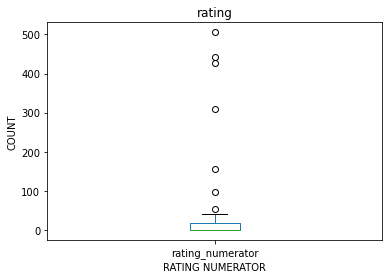

In [151]:
#box plot of values of 'rating_numerator' colum in the df 'rating_text'
rating_text.rating_numerator.value_counts().plot(kind='box', title='rating');
plt.ylabel('COUNT');
plt.xlabel('RATING NUMERATOR');

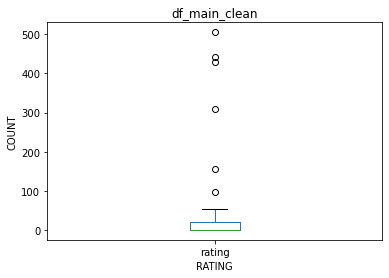

In [152]:
#box plot of values of 'rating' colum in the 'df_main_clean'
df_main_clean.rating.value_counts().plot(kind='box', title='df_main_clean');
plt.ylabel('COUNT');
plt.xlabel('RATING');

In [109]:
df_main_clean.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating  rating_d  \
0  This is Phineas. He's a mystical boy. Only eve...      13        10   
1  This is Tilly. She's just checking pup on you....      13        10   
2  This is Archie. He is a rare Norwegian Pouncin...      12        10   
3  This is Darla. She commenced a snooze mid meal...      13        10   
4  This is Franklin. He would like you to stop ca...      12        10   

       name dog_stage  
0   Phineas       NaN  
1     Tilly       NaN  
2    Archie       NaN  
3     Darla       NaN  
4  Franklin       NaN

> I thougt the destribution of values in the 'rating' colum in 'df_main_clean' were abnomal. But, after comparison with ones in the 'text' by both the result of describe method and box plots. It seems to me that both are similer distribution, and both values were not decided based on rules.

> There is no paticular reson to pick up and replace 'rating' column with the values from 'text'.

### image predictions.tsv

>This file is read as df_class on which cleaning process are made.

In [110]:
df_class=df1.copy()
df_class

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

In [111]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [112]:
df_class.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [113]:
#check numbers, dogs or not by p1 prediction
df_class.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [114]:
#check numbers, dogs or not by p2prediction
df_class.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [115]:
#pick up tweets for only dogs by p1 and p2 predictions
df_class=df_class[df_class.p1_dog& df_class.p2_dog!=False]
df_class

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg   
54    667044094246576128    https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg   
55    667062181243039745    https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg   
57    667073648344346624    https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg   
58    667090893657276420    https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg   
59    667119796878725120    https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg   
60    667138269671505920    https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg   
61    667152164079423490    https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg   
62    667160273090932737    https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg   
63    667165590075940865    https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg   
64    667171260800061440    https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg   
65    667174963120574464    https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg   
66    667176164155375616    https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg   
67    667177989038297088    https://pbs.twimg.com/media/CUJK18UWEA

In [116]:
#check abnomalities of names
df_class.p1.value_counts()

golden_retriever                  148
Labrador_retriever                 89
Pembroke                           83
Chihuahua                          65
pug                                47
Samoyed                            35
Pomeranian                         34
toy_poodle                         33
chow                               32
cocker_spaniel                     29
malamute                           28
French_bulldog                     23
miniature_pinscher                 21
German_shepherd                    20
Siberian_husky                     19
Staffordshire_bullterrier          19
Chesapeake_Bay_retriever           19
Cardigan                           18
beagle                             18
Eskimo_dog                         17
Shetland_sheepdog                  16
kuvasz                             16
Lakeland_terrier                   16
Rottweiler                         16
Shih-Tzu                           16
Maltese_dog                        15
Italian_grey

In [117]:
#pick up columns necessary, breed of dogs,its inference propabilities and url
#save'df_class' as csv file
df_class=df_class[['tweet_id', 'p1', 'p1_conf', 'p2', 'p2_conf','jpg_url']]
df_class.to_csv('df_class.csv', index=False)

In [118]:
df_class=pd.read_csv('df_class.csv')
df_class1=df_class.copy()

In [119]:
df_class1.head()

tweet_id                      p1   p1_conf                  p2  \
0  666020888022790149  Welsh_springer_spaniel  0.465074              collie   
1  666029285002620928                 redbone  0.506826  miniature_pinscher   
2  666033412701032449         German_shepherd  0.596461            malinois   
3  666044226329800704     Rhodesian_ridgeback  0.408143             redbone   
4  666049248165822465      miniature_pinscher  0.560311          Rottweiler   

    p2_conf                                          jpg_url  
0  0.156665  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  
1  0.074192  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg  
2  0.138584  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  
3  0.360687  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg  
4  0.243682  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg

In [120]:
# convert the names to lowercase
df_class1.p1=df_class1.p1.str.lower()
df_class1.p2=df_class1.p2.str.lower()
df_class1.head()

tweet_id                      p1   p1_conf                  p2  \
0  666020888022790149  welsh_springer_spaniel  0.465074              collie   
1  666029285002620928                 redbone  0.506826  miniature_pinscher   
2  666033412701032449         german_shepherd  0.596461            malinois   
3  666044226329800704     rhodesian_ridgeback  0.408143             redbone   
4  666049248165822465      miniature_pinscher  0.560311          rottweiler   

    p2_conf                                          jpg_url  
0  0.156665  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  
1  0.074192  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg  
2  0.138584  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  
3  0.360687  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg  
4  0.243682  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg

In [121]:
#rename columns name 
df_class1.rename(columns={'p1':'breed',
                         'p1_conf':'predictions',
                        'p2':'breed_runup',
                        'p2_conf':'predictions_runup'}, inplace=True)
df_class1

tweet_id                           breed  predictions  \
0     666020888022790149          welsh_springer_spaniel     0.465074   
1     666029285002620928                         redbone     0.506826   
2     666033412701032449                 german_shepherd     0.596461   
3     666044226329800704             rhodesian_ridgeback     0.408143   
4     666049248165822465              miniature_pinscher     0.560311   
5     666050758794694657            bernese_mountain_dog     0.651137   
6     666055525042405380                            chow     0.692517   
7     666058600524156928                miniature_poodle     0.201493   
8     666063827256086533                golden_retriever     0.775930   
9     666071193221509120                   gordon_setter     0.503672   
10    666073100786774016                    walker_hound     0.260857   
11    666082916733198337                             pug     0.489814   
12    666094000022159362                      bloodhound     0.195217   
13    666099513787052032                           lhasa     0.582330   
14    666102155909144576                  english_setter     0.298617   
15    666273097616637952               italian_greyhound     0.176053   
16    666287406224695296                     maltese_dog     0.857531   
17    666345417576210432                golden_retriever     0.858744   
18    666353288456101888                        malamute     0.336874   
19    666373753744588802     soft-coated_wheaten_terrier     0.326467   
20    666396247373291520                       chihuahua     0.978108   
21    666407126856765440         black-and-tan_coonhound     0.529139   
22    666418789513326592                     toy_terrier     0.149680   
23    666421158376562688                blenheim_spaniel     0.906777   
24    666428276349472768                        pembroke     0.371361   
25    666437273139982337                       chihuahua     0.671853   
26    666447344410484738          curly-coated_retriever     0.322084   
27    666454714377183233                       dalmatian     0.278954   
28    666644823164719104                    ibizan_hound     0.044333   
29    666649482315059201                   border_collie     0.447803   
30    666691418707132416                 german_shepherd     0.975401   
31    666701168228331520              labrador_retriever     0.887707   
32    666739327293083650                miniature_poodle     0.546933   
33    666781792255496192               italian_greyhound     0.618316   
34    666804364988780544                  english_setter     0.328792   
35    666817836334096384             miniature_schnauzer     0.496953   
36    666835007768551424                        airedale     0.448459   
37    667044094246576128                golden_retriever     0.765266   
38    667062181243039745        chesapeake_bay_retriever     0.825678   
39    667073648344346624                       chihuahua     0.483682   
40    667090893657276420                       chihuahua     0.959514   
41    667119796878725120                        pembroke     0.741563   
42    667138269671505920     west_highland_white_terrier     0.747713   
43    667152164079423490                      toy_poodle     0.535411   
44    667160273090932737                golden_retriever     0.471351   
45    667165590075940865              miniature_pinscher     0.140173   
46    667171260800061440                 giant_schnauzer     0.841265   
47    667174963120574464                      toy_poodle     0.266437   
48    667176164155375616     soft-coated_wheaten_terrier     0.318981   
49    667177989038297088                          vizsla     0.259249   
50    667182792070062081                golden_retriever     0.949892   
51    667192066997374976                      rottweiler     0.283640   
52    667200525029539841                  siberian_husky     0.694904   
53    667211855547486208                golden_retriever     0.462556   
5

In [122]:
#check duplication
df_class1.tweet_id.duplicated().sum()

0

In [123]:
#check null
df_class1.isnull().sum()

tweet_id             0
breed                0
predictions          0
breed_runup          0
predictions_runup    0
jpg_url              0
dtype: int64

> df_class1 is now clean and tidy, redy to merge

### tweet_json.text

>This file is read as 'df_tweet' on which the following cleaning process were made.

In [124]:
#read 'df2'from csv files
df2=pd.read_csv('df2.csv')

In [125]:
df_tweet=df2.copy()

In [126]:
#check duplication
df_tweet.duplicated().sum()

0

In [127]:
#double check unique 
df_tweet.tweet_id.nunique()

2331

In [128]:
#compare numbers of the unique ids and total number
df_tweet.tweet_id.count()

2331

In [129]:
#check null
df_tweet.isnull().sum()

tweet_id     0
favorites    0
retweet      0
dtype: int64

In [130]:
df_tweet.rename(columns={'favorites': 'favorites_count',
                                  'retweet':'retweet_count'}, inplace =True)

In [131]:
df_tweet.head()

tweet_id  favorites_count  retweet_count
0  892420643555336193            35565           7534
1  892177421306343426            30753           5589
2  891815181378084864            23129           3703
3  891689557279858688            38845           7709
4  891327558926688256            37102           8316

In [132]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorites_count  2331 non-null   int64
 2   retweet_count    2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


> df_tweet is clean and tidy, redy to merge 

### Merge Thee Dataframes

In [133]:
#merge 'df_main_clean' with 'df_class1' as 'df_new'
df_new=pd.merge(df_main_clean, df_class1, how='left', on='tweet_id')
df_new.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating  rating_d  \
0  This is Phineas. He's a mystical boy. Only eve...      13        10   
1  This is Tilly. She's just checking pup on you....      13        10   
2  This is Archie. He is a rare Norwegian Pouncin...      12        10   
3  This is Darla. She commenced a snooze mid meal...      13        10   
4  This is Franklin. He would like you to stop ca...      12        10   

       name dog_stage      breed  predictions       breed_runup  \
0   Phineas       NaN        NaN          NaN               NaN   
1     Tilly       NaN  chihuahua     0.323581          pekinese   
2    Archie       NaN  chihuahua     0.716012          malamute   
3     Darla       NaN        NaN          NaN               NaN   
4  Franklin       NaN     basset     0.555712  english_springer   

   predictions_runup                                          jpg_url  
0                NaN                                              NaN  
1           0.090647  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  
2           0.078253  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  
3                NaN                                              NaN  
4           0.225770  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg

In [134]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2184
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2185 non-null   int64              
 1   timestamp          2185 non-null   datetime64[ns, UTC]
 2   source             2185 non-null   object             
 3   text               2185 non-null   object             
 4   rating             2185 non-null   int64              
 5   rating_d           2185 non-null   int64              
 6   name               2080 non-null   object             
 7   dog_stage          356 non-null    object             
 8   breed              1357 non-null   object             
 9   predictions        1357 non-null   float64            
 10  breed_runup        1357 non-null   object             
 11  predictions_runup  1357 non-null   float64            
 12  jpg_url            1357 non-null   object       

In [135]:
#create new and final df as 'df_weratedogs' by merge 'df_new' with 'df_tweet'
df_weratedogs=pd.merge(df_new, df_tweet, how='left', on='tweet_id')
df_weratedogs.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating  rating_d  \
0  This is Phineas. He's a mystical boy. Only eve...      13        10   
1  This is Tilly. She's just checking pup on you....      13        10   
2  This is Archie. He is a rare Norwegian Pouncin...      12        10   
3  This is Darla. She commenced a snooze mid meal...      13        10   
4  This is Franklin. He would like you to stop ca...      12        10   

       name dog_stage      breed  predictions       breed_runup  \
0   Phineas       NaN        NaN          NaN               NaN   
1     Tilly       NaN  chihuahua     0.323581          pekinese   
2    Archie       NaN  chihuahua     0.716012          malamute   
3     Darla       NaN        NaN          NaN               NaN   
4  Franklin       NaN     basset     0.555712  english_springer   

   predictions_runup                                          jpg_url  \
0                NaN                                              NaN   
1           0.090647  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2           0.078253  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3                NaN                                              NaN   
4           0.225770  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

   favorites_count  retweet_count  
0          35565.0         7534.0  
1          30753.0         5589.0  
2          23129.0         3703.0  
3          38845.0         7709.0  
4          37102.0         8316.0

In [153]:
# remove retweets
df_weratedogs=df_weratedogs[~df_weratedogs.text.str.startswith("RT")]

In [154]:
# test
df_weratedogs[df_weratedogs.text.str.startswith("RT")]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating, rating_d, name, dog_stage, breed, predictions, breed_runup, predictions_runup, jpg_url, favorites_count, retweet_count]
Index: []

In [155]:
df_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2184
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2185 non-null   int64  
 1   timestamp          2185 non-null   object 
 2   source             2185 non-null   object 
 3   text               2185 non-null   object 
 4   rating             2185 non-null   int64  
 5   rating_d           2185 non-null   int64  
 6   name               2080 non-null   object 
 7   dog_stage          356 non-null    object 
 8   breed              1357 non-null   object 
 9   predictions        1357 non-null   float64
 10  breed_runup        1357 non-null   object 
 11  predictions_runup  1357 non-null   float64
 12  jpg_url            1357 non-null   object 
 13  favorites_count    2178 non-null   float64
 14  retweet_count      2178 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 273.1+ KB


## 4. Storing, Analyzing and Visualizing Data

In [156]:
#save cleaned and merged 'df_weratedogs' to csv files
df_weratedogs.to_csv('weratedogs.csv', index=False)

In [157]:
#read 'df_weratedog' from csv files
df_weratedogs=pd.read_csv('weratedogs.csv')
df_weratedogs.head()

tweet_id                  timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating  rating_d  \
0  This is Phineas. He's a mystical boy. Only eve...      13        10   
1  This is Tilly. She's just checking pup on you....      13        10   
2  This is Archie. He is a rare Norwegian Pouncin...      12        10   
3  This is Darla. She commenced a snooze mid meal...      13        10   
4  This is Franklin. He would like you to stop ca...      12        10   

       name dog_stage      breed  predictions       breed_runup  \
0   Phineas       NaN        NaN          NaN               NaN   
1     Tilly       NaN  chihuahua     0.323581          pekinese   
2    Archie       NaN  chihuahua     0.716012          malamute   
3     Darla       NaN        NaN          NaN               NaN   
4  Franklin       NaN     basset     0.555712  english_springer   

   predictions_runup                                          jpg_url  \
0                NaN                                              NaN   
1           0.090647  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2           0.078253  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3                NaN                                              NaN   
4           0.225770  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

   favorites_count  retweet_count  
0          35565.0         7534.0  
1          30753.0         5589.0  
2          23129.0         3703.0  
3          38845.0         7709.0  
4          37102.0         8316.0

In [158]:
# check the popularity of breed
df_weratedogs.breed.value_counts()

golden_retriever                  141
labrador_retriever                 87
pembroke                           82
chihuahua                          61
pug                                44
pomeranian                         34
toy_poodle                         32
samoyed                            32
chow                               31
malamute                           28
cocker_spaniel                     26
french_bulldog                     23
german_shepherd                    20
miniature_pinscher                 20
chesapeake_bay_retriever           19
siberian_husky                     19
staffordshire_bullterrier          18
beagle                             17
eskimo_dog                         17
rottweiler                         16
cardigan                           16
kuvasz                             16
shetland_sheepdog                  16
shih-tzu                           16
lakeland_terrier                   15
italian_greyhound                  15
maltese_dog 

#### Insight 1
> The most popular breed is Golden retriver, followed by Labrador retriver, Pembroke and Chihahua and so on.

In [160]:
#check the populariry of names
df_weratedogs.name.value_counts()

None              685
Charlie            11
Lucy               11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Sadie               8
Lola                8
Winston             8
Daisy               7
Toby                7
Oscar               6
Stanley             6
Koda                6
Bailey              6
Bo                  6
Bella               6
Jax                 6
Chester             5
Maggie              5
Leo                 5
Dave                5
Rusty               5
Scout               5
Milo                5
Louis               5
Buddy               5
Bentley             5
Phil                4
Jack                4
Bear                4
Winnie              4
Clarence            4
Cassie              4
Alfie               4
Chip                4
Jeffrey             4
Clark               4
Sammy               4
Boomer              4
Gus                 4
Scooter             4
Gary                4
Sophie              4
Duke      

#### Insight 2

>The most popular name is Charlie followed by Lucy, Cooper, Oliver, Tucker, Penny and so on. But, there are variety of names, i.e. 955 names including funny ones such as Meatball.

In [161]:
#check the Tweets favorites
df_weratedogs.favorites_count.sort_values(ascending=False)

872     153418.0
350     130786.0
449     118417.0
119     114494.0
912     113353.0
63       97653.0
376      86641.0
147      84953.0
1598     77712.0
103      77381.0
451      74751.0
1662     73626.0
71       73108.0
35       70962.0
136      69834.0
39       66876.0
302      66092.0
22       63353.0
110      61010.0
7        59926.0
336      56450.0
309      52679.0
383      51492.0
508      49719.0
120      49071.0
947      49068.0
946      49068.0
713      48943.0
51       46748.0
53       45648.0
535      45207.0
375      45143.0
2122     44718.0
462      44520.0
12       44288.0
166      43764.0
165      43764.0
759      43499.0
208      43433.0
21       42767.0
444      42662.0
42       42258.0
48       41352.0
195      41111.0
106      39701.0
70       38908.0
3        38845.0
910      38646.0
92       37849.0
4        37102.0
775      36621.0
407      36353.0
311      36137.0
327      36011.0
1494     35889.0
0        35565.0
1564     35325.0
435      35244.0
1295     35070

In [162]:
#identify the id of most favorites Tweet
df_weratedogs.iloc[872]

tweet_id                                            744234799360020481
timestamp                                    2016-06-18 18:26:18+00:00
source                                              Twitter for iPhone
text                 Here's a doggo realizing you can stand in a po...
rating                                                              13
rating_d                                                            10
name                                                              None
dog_stage                                                        doggo
breed                                                              NaN
predictions                                                        NaN
breed_runup                                                        NaN
predictions_runup                                                  NaN
jpg_url                                                            NaN
favorites_count                                                 153418
retwee

> There is no information such as name, breed nor photo url neverthless of the top rank.

In [163]:
# identify id of 2nd favorites Tweed
df_weratedogs.iloc[350]

tweet_id                                            822872901745569793
timestamp                                    2017-01-21 18:26:02+00:00
source                                              Twitter for iPhone
text                 Here's a super supportive puppo participating ...
rating                                                              13
rating_d                                                            10
name                                                              None
dog_stage                                                        puppo
breed                                                 lakeland_terrier
predictions                                                   0.196015
breed_runup                                         labrador_retriever
predictions_runup                                             0.160329
jpg_url                https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
favorites_count                                                 130786
retwee

In [164]:
# Photo of 2nd favorite Tweet, 
url=df_weratedogs.jpg_url[350]
Image(url=url)

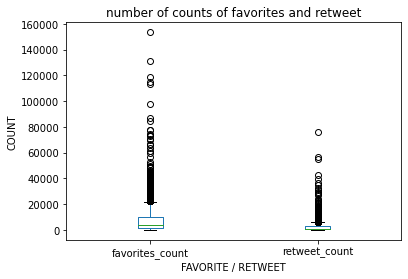

In [165]:
# Distribution of the numbers of tweet of favorites and retweet
df_retweet=df_weratedogs[['favorites_count','retweet_count']]
df_retweet.plot(kind='box', title='number of counts of favorites and retweet').set_ylabel('COUNT');
plt.xlabel('FAVORITE / RETWEET');


#### Insight 3

> Those top favorites and retweet may be outliers. I can not go further as to check if those numbers are statistically significant etc.

#### Visualization

>Photo of 2nd best favorites and box plot to show how are the distribution of those counts. Many outliers are there that makes difficult to analyze statistically.

In [166]:
#save to 'twitter_archive_master.csv'
df_weratedogs.to_csv('twitter_archive_master.csv', index=False)